In [102]:
import os
import pandas as pd
import numpy as np
import pickle
import json

import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
city = 'paris'
db = "0.50"
OC = 1.5

In [104]:
directory = '../../raw_results'
file_names = os.listdir(directory)

# https://www.gurobi.com/documentation/current/refman/optimization_status_codes.html
status_map = {2: 'optimal', 9: 'time_limit', 11: 'interrumpted'}

results = []

for i in range(len(file_names)):
    results_file = f'{directory}/{file_names[i]}'
    with open(results_file, 'rb') as file:
        sol = pickle.load(file)
    keys = file_names[i].split('_')
    final_sol = {
        'city': keys[0],
        'db': keys[1].replace('db=', ''),
        'OC': keys[2].replace('OC=', ''),
        'model': keys[3].replace('model=', '').replace('.pkl', ''),
        'max_n_shifts': keys[-1].replace('shifts=', '').replace('.pkl', '') if 'shifts' in keys[-1] else "",
        'obj_val': sol['obj_val'], 
        'status': status_map[sol['status']], 
        'gap': np.round(float(sol['gap']) * 100, 2),
        'workforce_size': len(sol['U'])
    }
    results.append(final_sol)

results_df = pd.DataFrame(results)
results_df['model_'] = results_df['model'] + results_df['max_n_shifts']
results_df = results_df.query(f'city == "{city}"').sort_values(['db', 'OC', 'model'])

model_results = pd.pivot_table(results_df, index=['city', 'db', 'OC'], 
    values=['obj_val', 'workforce_size'], columns='model_').astype(int)
model_results

obj_val                                      workforce_size  \
model_           fixed   flex partflex2 partflex3 partflex4          fixed   
city  db   OC                                                                
paris 0.50 1.2    3587   3168      3587      3168      3168            236   
           1.5    3768   3272      3768      3272      3272            244   
           1.8    3970   3452      3970      3452      3452            250   
           2.0    4097   3565      4097      3565      3565            250   
           2.5    4218   3717      4218      3717      3717            266   
      1.00 1.2    6684   5623      6684      5623      5623            428   
           1.5    7013   5956      7013      5956      5956            450   
           1.8    7321   6189      7321      6189      6189            458   
           2.0    7480   6294      7480      6294      6294            474   
           2.5    7812   6715      7812      6715      6715            490   
      2.00 1.2   12969  11011     12969     11011     11011            824   
           1.5   13676  11609     13676     11609     11609            862   
           1.8   14231  12033     14231     12033     12033            888   
           2.0   14616  12440     14616     12440     12440            902   
           2.5   15396  13305     15396     13305     13305            932   
      4.00 1.2   25363  21320     25363     21320     21320           1584   
           1.5   26799  22471     26799     22471     22471           1646   
           1.8   27863  23710     27863     23710     23710           1714   
           2.0   28555  24345     28555     24345     24345           1746   
           2.5   29865  25968     29865     25968     25968           1828   

                                                    
model_          flex partflex2 partflex3 partflex4  
city  db   OC                                       
paris 0.50 1.2   294       236       294       294  
           1.5   318       244       318       318  
           1.8   327       250       327       327  
           2.0   327       250       327       327  
           2.5   339       266       339       339  
      1.00 1.2   582       428       582       582  
           1.5   582       450       582       582  
           1.8   603       458       603       603  
           2.0   615       474       615       615  
           2.5   615       490       615       615  
      2.00 1.2  1041       824      1041      1041  
           1.5  1077       862      1077      1077  
           1.8  1122       888      1122      1122  
           2.0  1122       902      1122      1122  
           2.5  1134       932      1134      1134  
      4.00 1.2  2028      1584      2028      2028  
           1.5  2088      1646      2088      2088  
           1.8  2100      1714      2100      2100  
           2.0  2124      1746      2124      2124  
           2.5  2181      1828      2181      2181

In [105]:
# save table to latex
latex_table = model_results.reset_index().drop('city', axis='columns')#.to_latex(index=False, multicolumn=False)
latex_table

<ipython-input-105-ed1547e351eb>:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  latex_table = model_results.reset_index().drop('city', axis='columns')#.to_latex(index=False, multicolumn=False)


db   OC obj_val                                      workforce_size  \
model_              fixed   flex partflex2 partflex3 partflex4          fixed   
0       0.50  1.2    3587   3168      3587      3168      3168            236   
1       0.50  1.5    3768   3272      3768      3272      3272            244   
2       0.50  1.8    3970   3452      3970      3452      3452            250   
3       0.50  2.0    4097   3565      4097      3565      3565            250   
4       0.50  2.5    4218   3717      4218      3717      3717            266   
5       1.00  1.2    6684   5623      6684      5623      5623            428   
6       1.00  1.5    7013   5956      7013      5956      5956            450   
7       1.00  1.8    7321   6189      7321      6189      6189            458   
8       1.00  2.0    7480   6294      7480      6294      6294            474   
9       1.00  2.5    7812   6715      7812      6715      6715            490   
10      2.00  1.2   12969  11011     12969     11011     11011            824   
11      2.00  1.5   13676  11609     13676     11609     11609            862   
12      2.00  1.8   14231  12033     14231     12033     12033            888   
13      2.00  2.0   14616  12440     14616     12440     12440            902   
14      2.00  2.5   15396  13305     15396     13305     13305            932   
15      4.00  1.2   25363  21320     25363     21320     21320           1584   
16      4.00  1.5   26799  22471     26799     22471     22471           1646   
17      4.00  1.8   27863  23710     27863     23710     23710           1714   
18      4.00  2.0   28555  24345     28555     24345     24345           1746   
19      4.00  2.5   29865  25968     29865     25968     25968           1828   

                                            
model_  flex partflex2 partflex3 partflex4  
0        294       236       294       294  
1        318       244       318       318  
2        327       250       327       327  
3        327       250       327       327  
4        339       266       339       339  
5        582       428       582       582  
6        582       450       582       582  
7        603       458       603       603  
8        615       474       615       615  
9        615       490       615       615  
10      1041       824      1041      1041  
11      1077       862      1077      1077  
12      1122       888      1122      1122  
13      1122       902      1122      1122  
14      1134       932      1134      1134  
15      2028      1584      2028      2028  
16      2088      1646      2088      2088  
17      2100      1714      2100      2100  
18      2124      1746      2124      2124  
19      2181      1828      2181      2181

In [106]:
# VALIDATION
model_results_ = pd.pivot_table(results_df, index=['city', 'db', 'OC'], 
    values='obj_val', columns='model_').astype(int)

display(model_results_.query('fixed < partflex3'))
display(model_results_.query('fixed < partflex4'))

,,model_,fixed,flex,partflex2,partflex3,partflex4
city,db,OC,,,,,


,,model_,fixed,flex,partflex2,partflex3,partflex4
city,db,OC,,,,,


# PLOTS

In [107]:
directory = '../../raw_results'
file_names = [file for file in os.listdir(directory) if f'{city}_db={db}_OC={OC}' in file]
file_names

['paris_db=0.50_OC=1.5_model=partflex_max_n_shifts=2.pkl',
 'paris_db=0.50_OC=1.5_model=partflex_max_n_shifts=3.pkl',
 'paris_db=0.50_OC=1.5_model=fixed.pkl',
 'paris_db=0.50_OC=1.5_model=flex.pkl',
 'paris_db=0.50_OC=1.5_model=partflex_max_n_shifts=4.pkl']

In [108]:
solution_file = 'paris_db=1.00_OC=1.5_model=partflex_max_n_shifts=3.pkl'
with open(f'{directory}/{solution_file}', 'rb') as file:
    solution = pickle.load(file)

area_assignment = [ (key[0], key[1], key[2], key[3]) for key, value in solution['k'].items() ]
area_assignment_df = pd.DataFrame(area_assignment, columns=['employee', 'area_id', 'period', 'day'])
area_period_summary = area_assignment_df.groupby(['area_id', 'day', 'period']).count().reset_index()
area_period_summary['day_period'] = area_period_summary['day'].astype(str) + '\n' + area_period_summary['period'].astype(str)

area_region_map = {}
for r, areas in solution['reg_areas'].items():
    for a in areas:
        area_region_map[a] = r

In [110]:
def data_prepare(solution, subset_areas=None):
    area_assignment = [ (key[0], key[1], key[2], key[3]) for key, value in solution['k'].items() ]
    area_assignment_df = pd.DataFrame(area_assignment, columns=['employee', 'area_id', 'period', 'day'])
    area_period_summary = area_assignment_df.groupby(['area_id', 'day', 'period']).count().reset_index()
    #area_period_summary['day_period'] = area_period_summary['day'].astype(str) + '\n' + area_period_summary['period'].astype(str)
    area_period_summary['day_period'] = area_period_summary['day'].astype(str) + '-' + area_period_summary['period'].astype(str)

    # Subset area
    if subset_areas is not None:
        area_period_summary = area_period_summary[area_period_summary['area_id'].apply(lambda x: x in subset_areas)]

    return area_period_summary

In [111]:
def plot_area_periods(solution_file, solution, area_period_summary, is_baseline=False):
    fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(30,10))

    pt = pd.pivot(area_period_summary, index="area_id", columns='day_period', values="employee")
    sns.heatmap(pt, annot=True, ax=axs, cbar=False, cmap='Blues')

    model_ = solution_file.split('model=')[1]
    if 'max_n' in model_:
        model = model_.split('_max')[0].split('.')[0].upper() + f' (max number of shifts = { model_.split("max_n_shifts=")[1].replace(".pkl","") })'
    else:
        model = model_.split('_max')[0].split('.')[0].upper()

    city = solution_file.split('_')[0].upper()
    db = solution_file.split('db=')[1].split('_')[0]
    oc = solution_file.split('OC=')[1].split('_')[0]
    title = city + ' DB=' + db + ' OC=' + oc + '\n' + model
    
    try:
        obj_val = int(solution['obj_val'])
        emp = 0
        for k, e in solution['employees'].items():
            if emp < max(e):
                emp = max(e)
        wk_size = emp
    except:
        # baseline
        obj_val = int(solution['objective_value'][0])
        wk_size = solution['workforce_size'][0]
    
    if is_baseline:
        title = 'BASELINE ' + title
    title += f'\n Obj val: {obj_val} - wk size: {wk_size}'
        
    axs.set_title(title, fontsize=16)
    axs.set_ylabel('Areas', fontsize=16)
    axs.set_xlabel('Time', fontsize=16)
    plt.yticks(rotation=0)

    plt.show()

In [112]:
def plot_region_periods(solution_file, solution, area_period_summary, is_baseline=False):
    fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(30,5))

    pt = pd.pivot(area_period_summary, index="region_id", columns='day_period', values="employee")
    sns.heatmap(pt, annot=True, ax=axs, cbar=False, cmap='Blues', fmt='g')

    model_ = solution_file.split('model=')[1]
    if 'max_n' in model_:
        model = model_.split('_max')[0].split('.')[0].upper() + f' (max number of shifts = { model_.split("max_n_shifts=")[1].replace(".pkl","") })'
    else:
        model = model_.split('_max')[0].split('.')[0].upper()

    city = solution_file.split('_')[0].upper()
    db = solution_file.split('db=')[1].split('_')[0]
    oc = solution_file.split('OC=')[1].split('_')[0]
    title = city + ' DB=' + db + ' OC=' + oc + '\n' + model
    
    try:
        obj_val = int(solution['obj_val'])
        emp = 0
        for k, e in solution['employees'].items():
            if emp < max(e):
                emp = max(e)
        wk_size = emp
    except:
        # baseline
        obj_val = int(solution['objective_value'][0])
        wk_size = int(solution['workforce_size'][0])
    
    if is_baseline:
        title = 'BASELINE ' + title
    title += f'\n Obj val: {obj_val} - wk size: {wk_size}'
        
    axs.set_title(title, fontsize=16)
    axs.set_ylabel('Regions', fontsize=16)
    axs.set_xlabel('Time', fontsize=16)
    plt.yticks(rotation=0)

    plt.show()

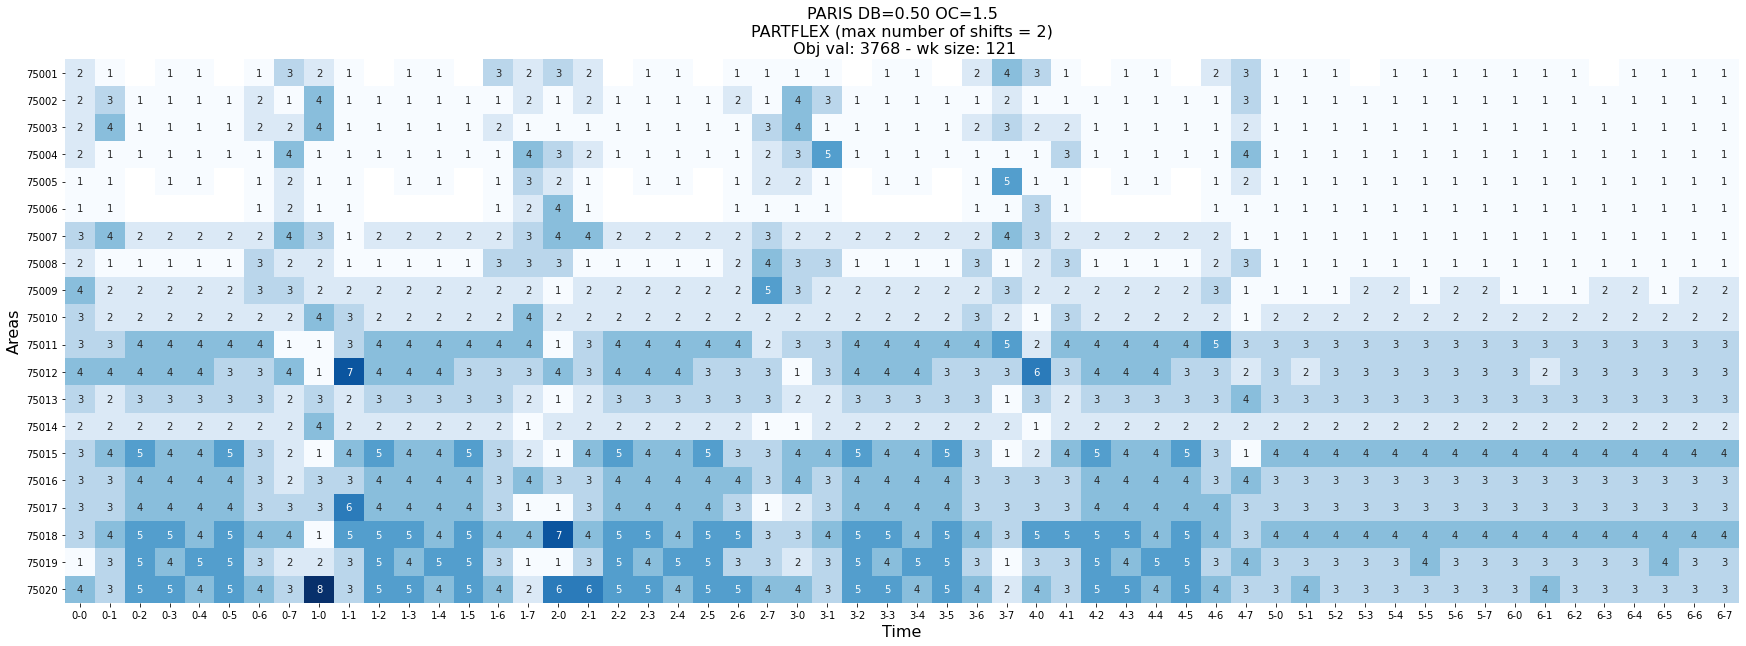

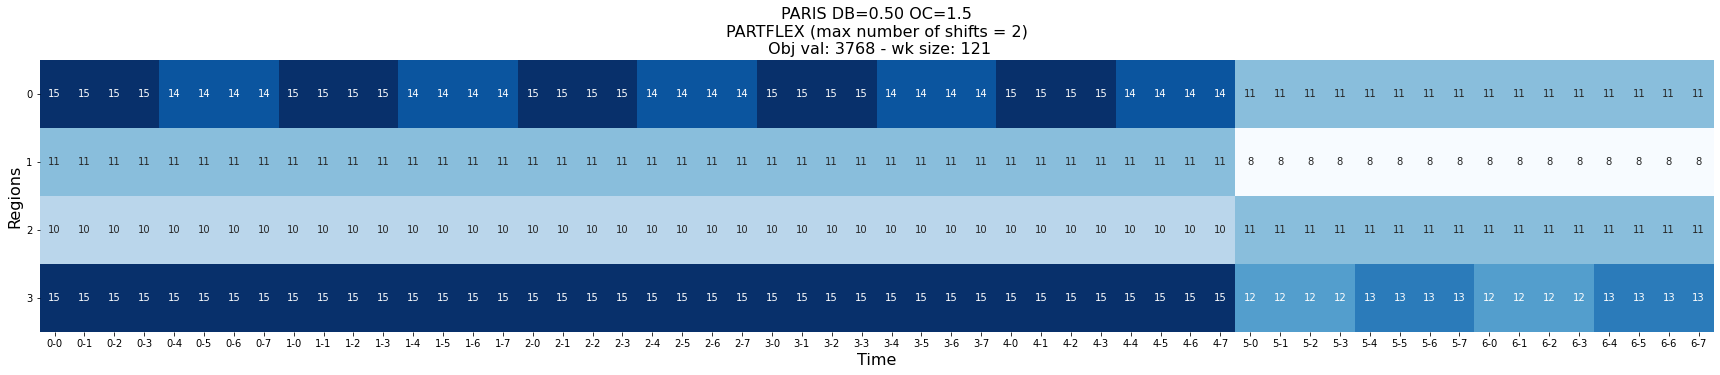

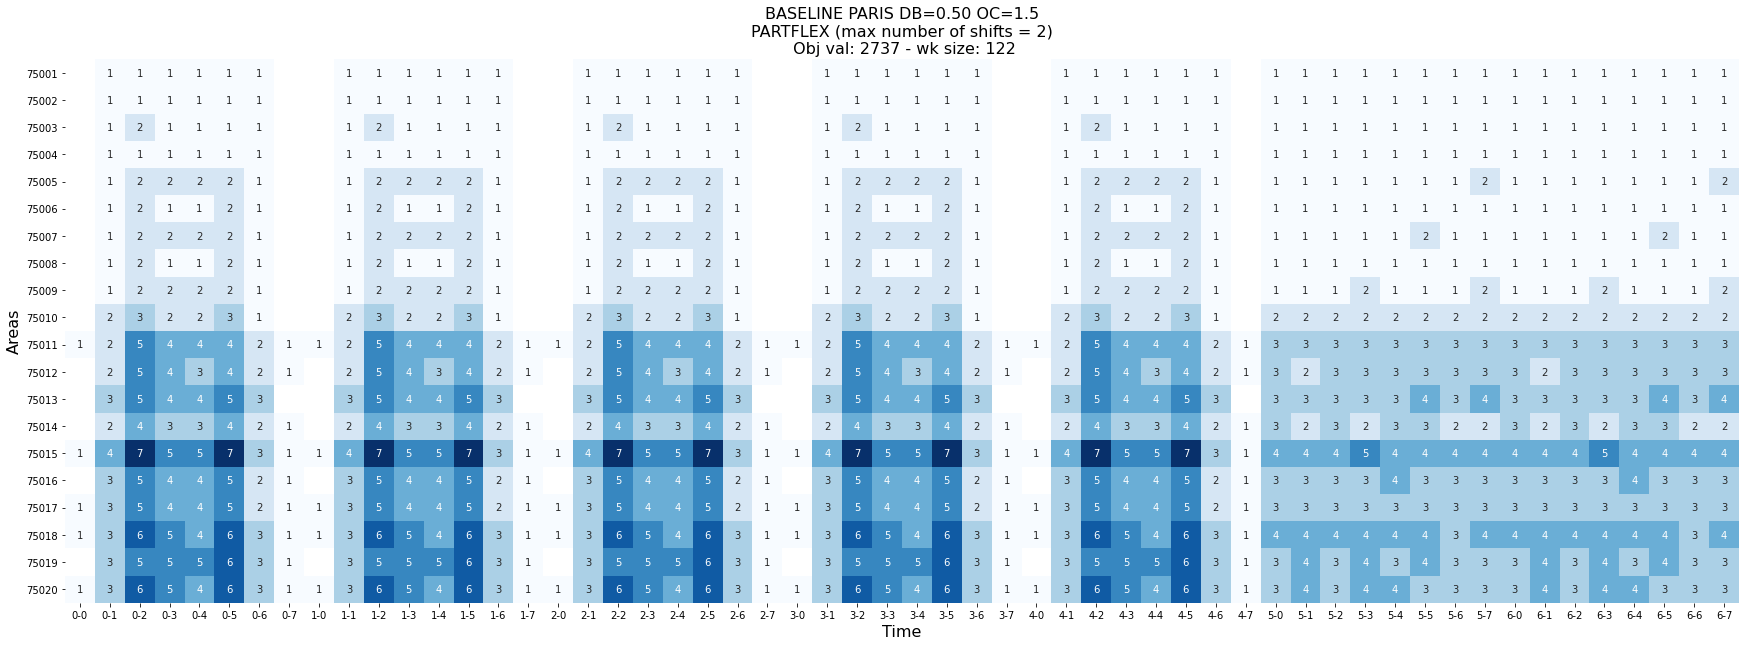

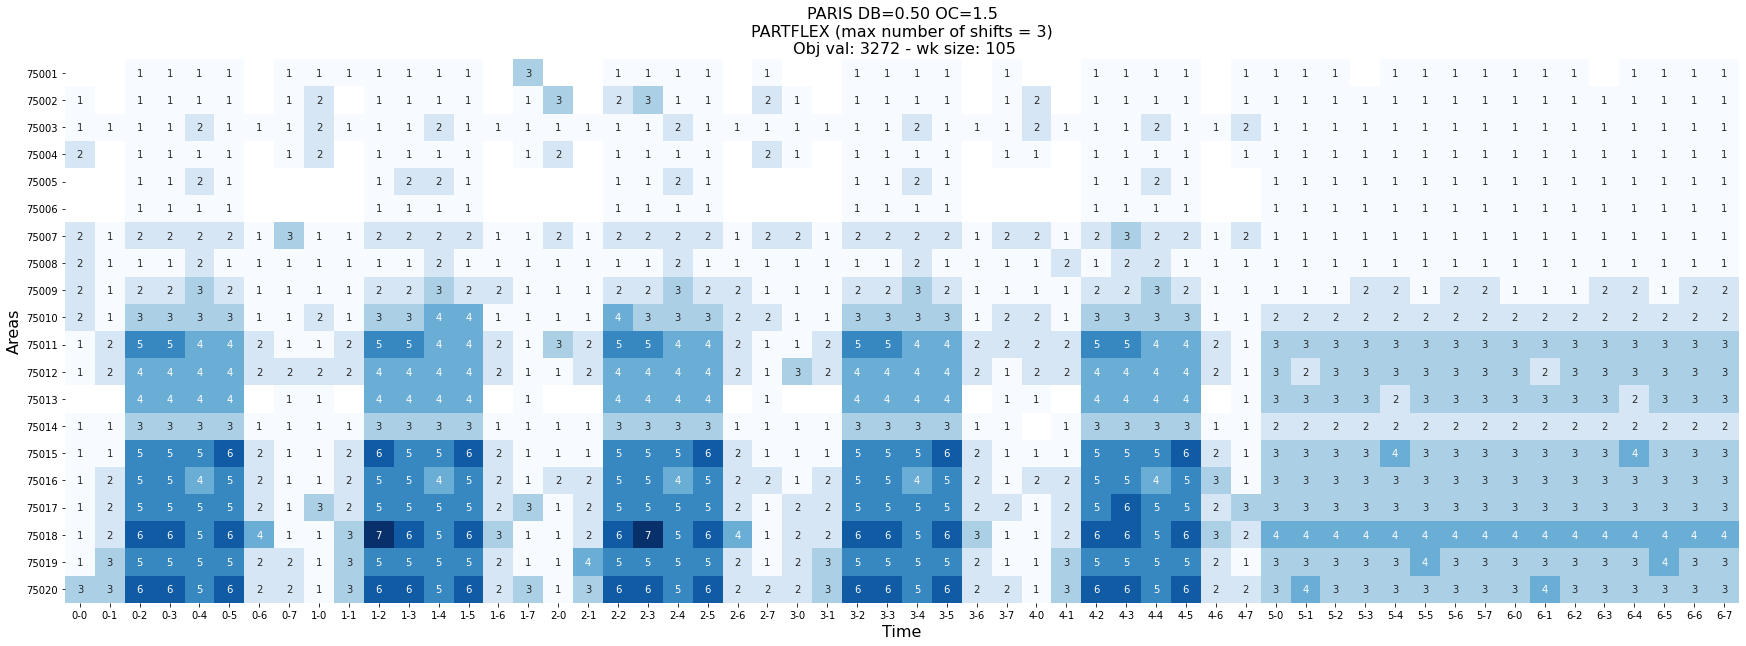

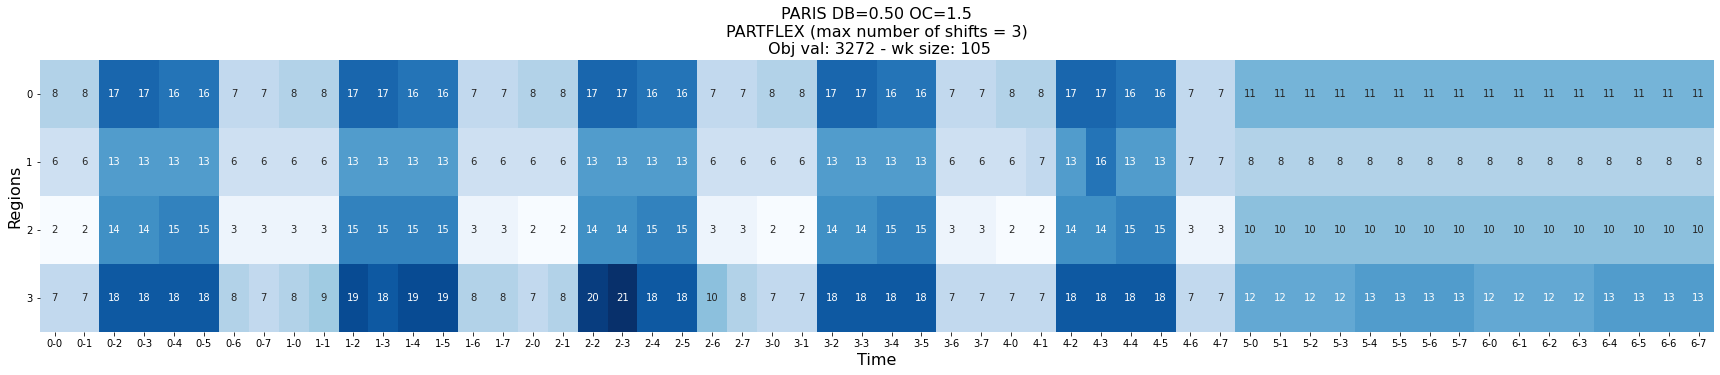

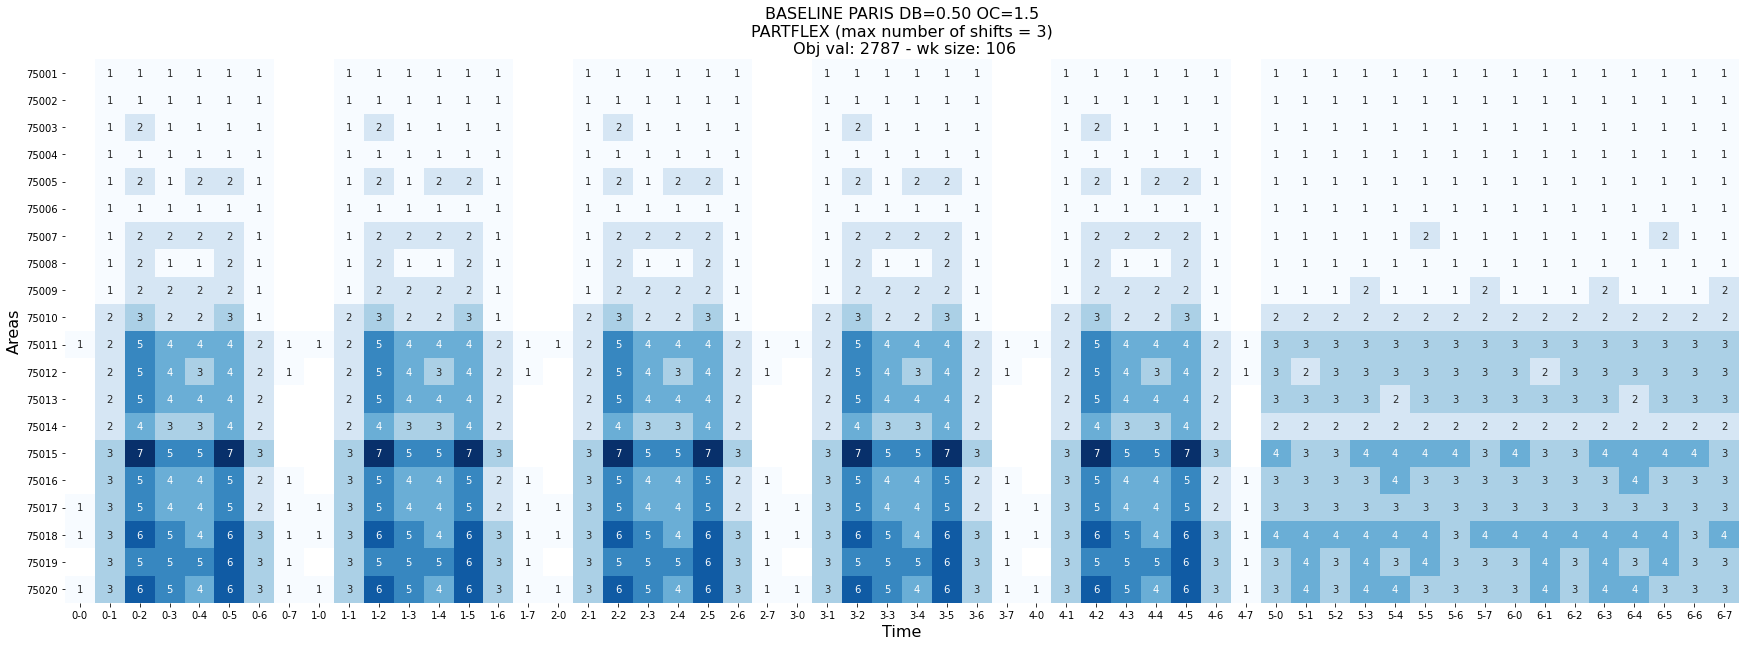

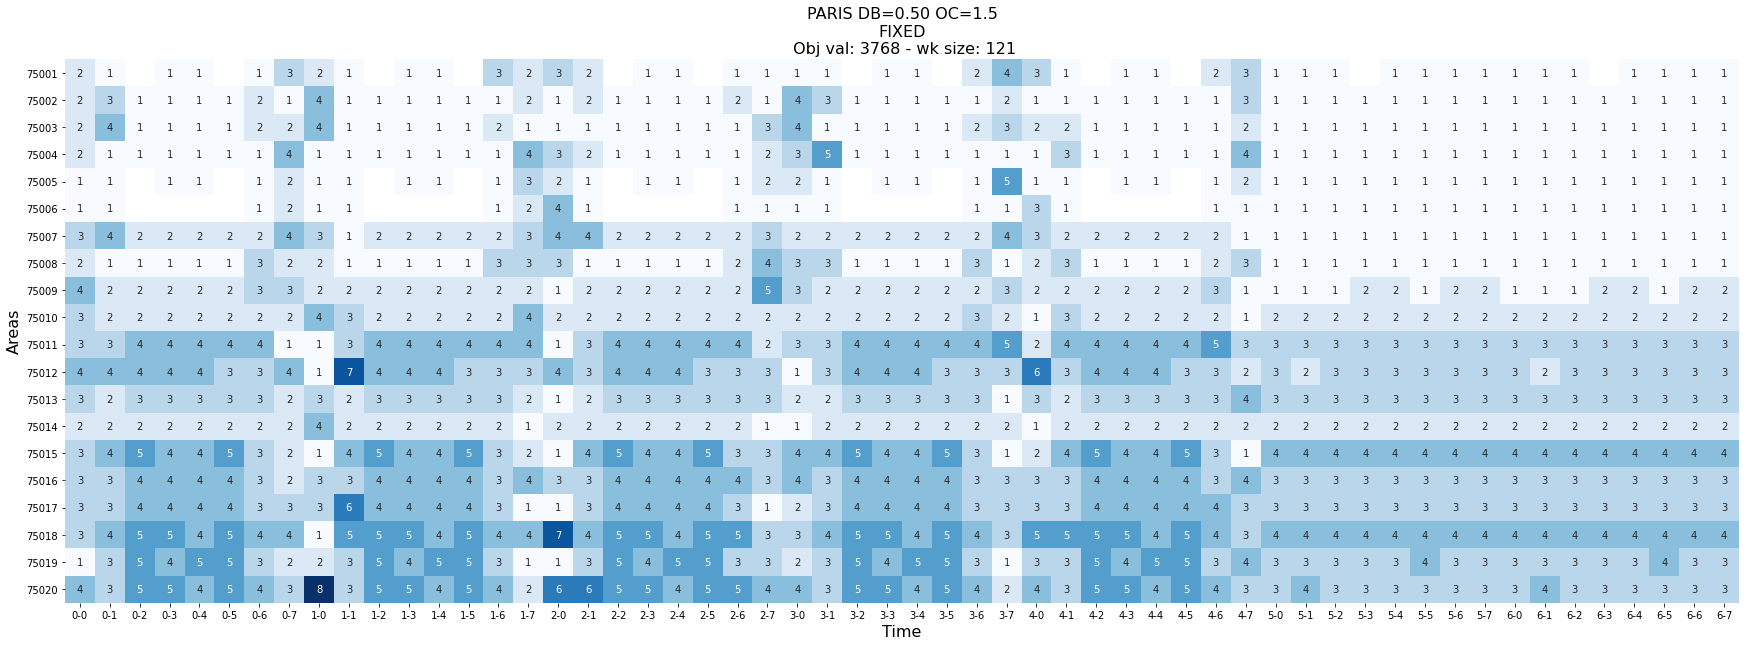

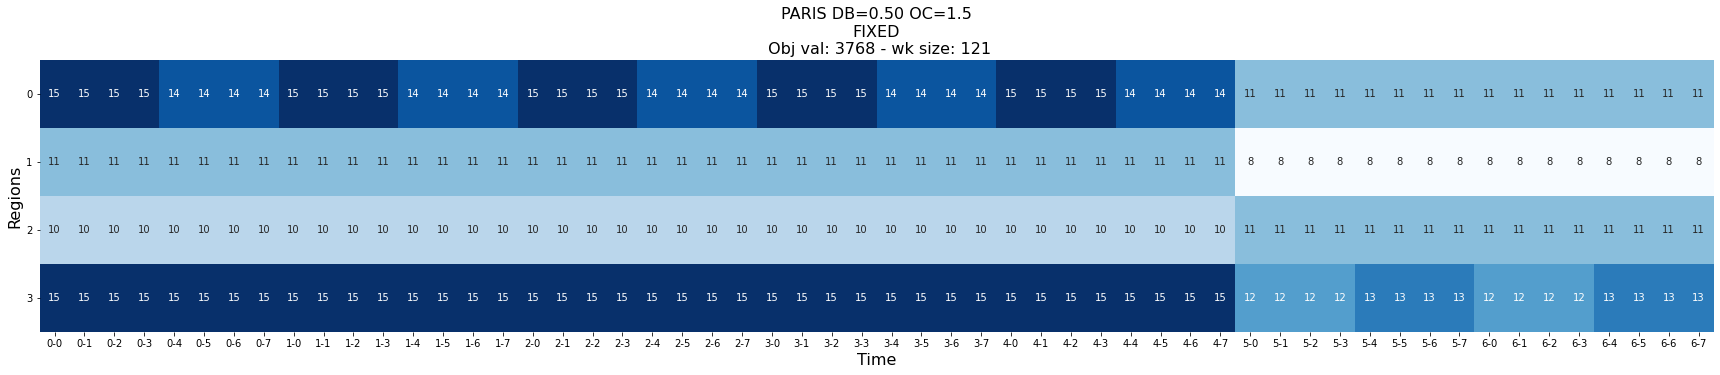

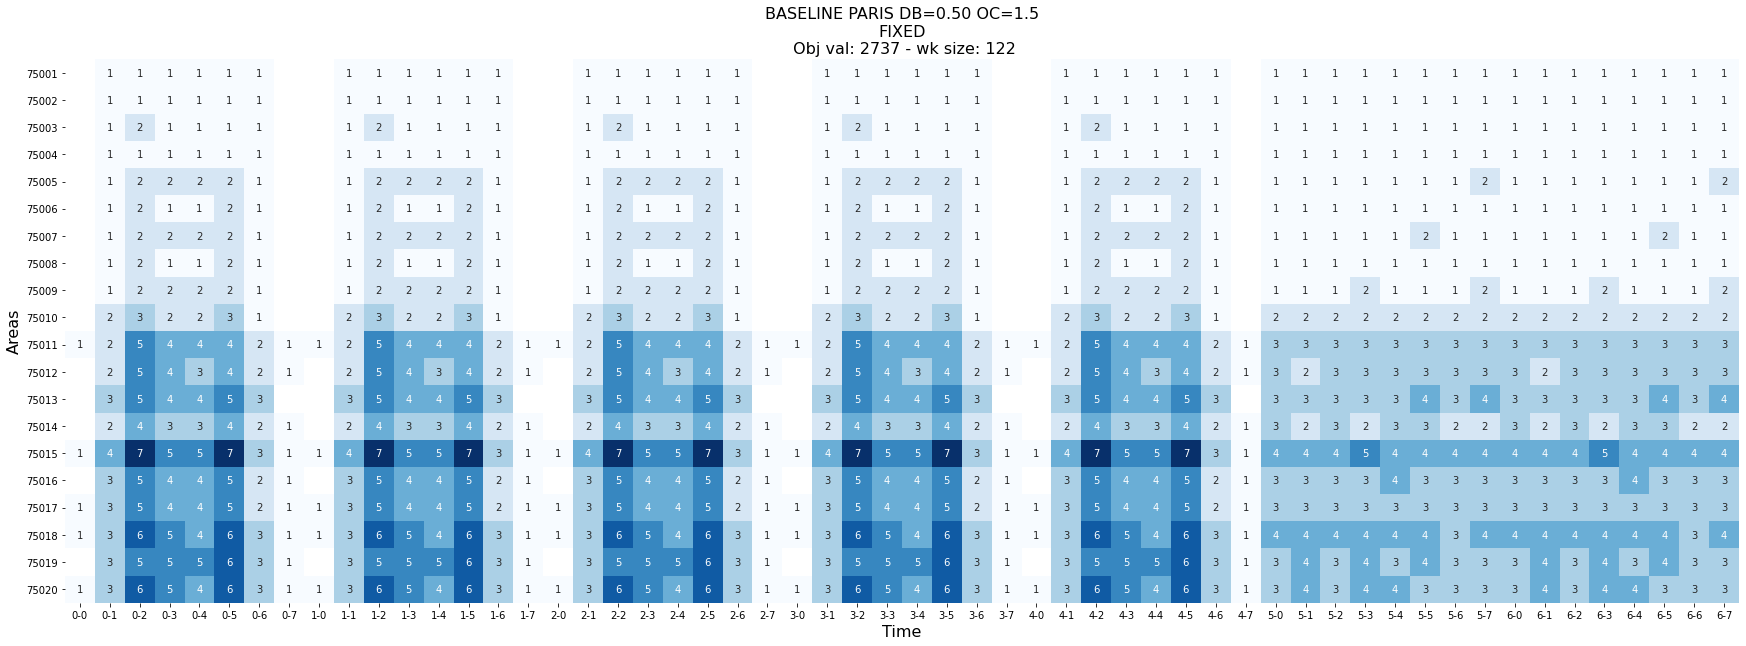

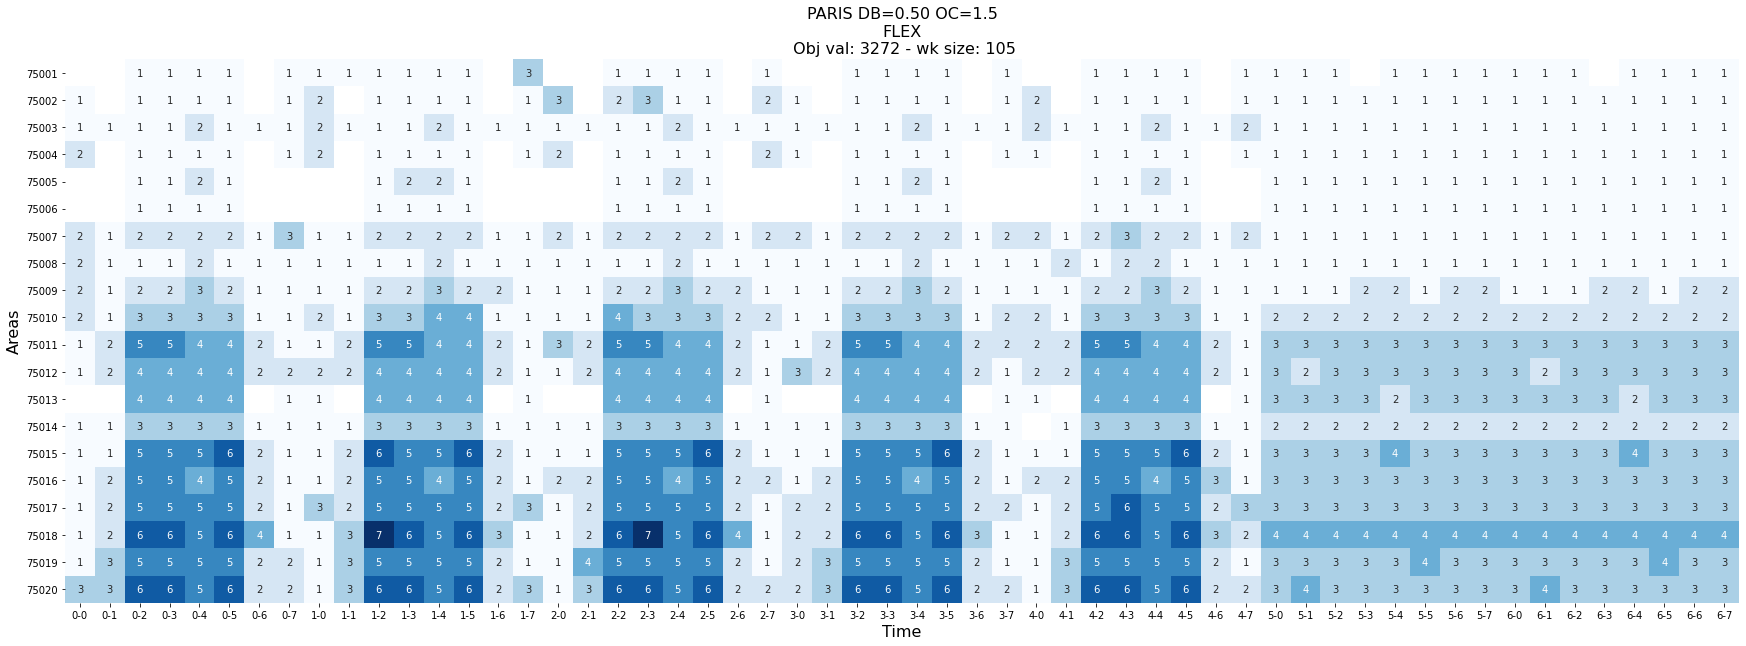

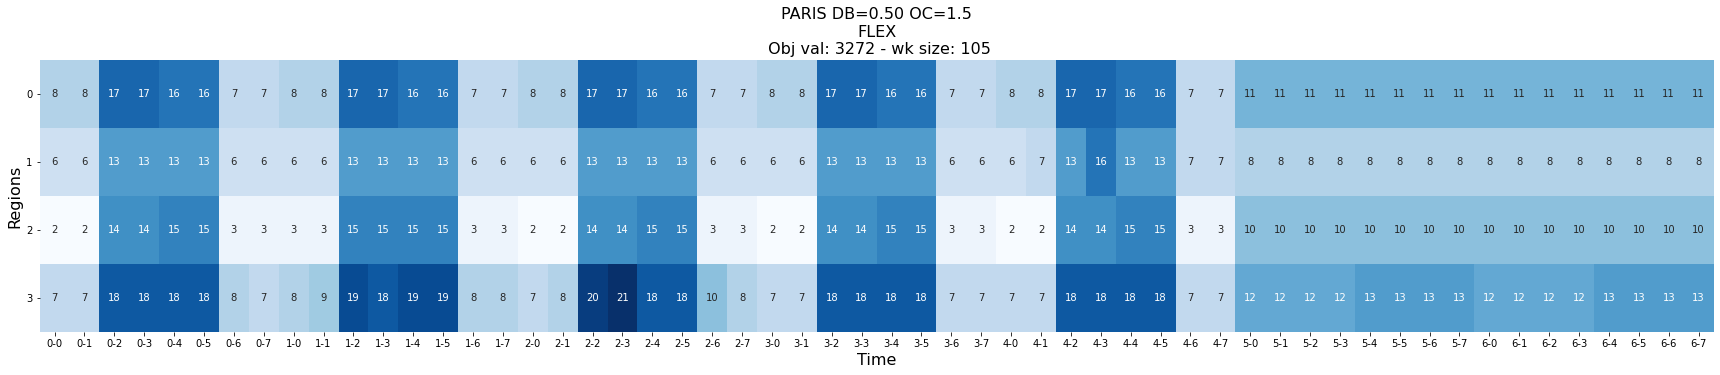

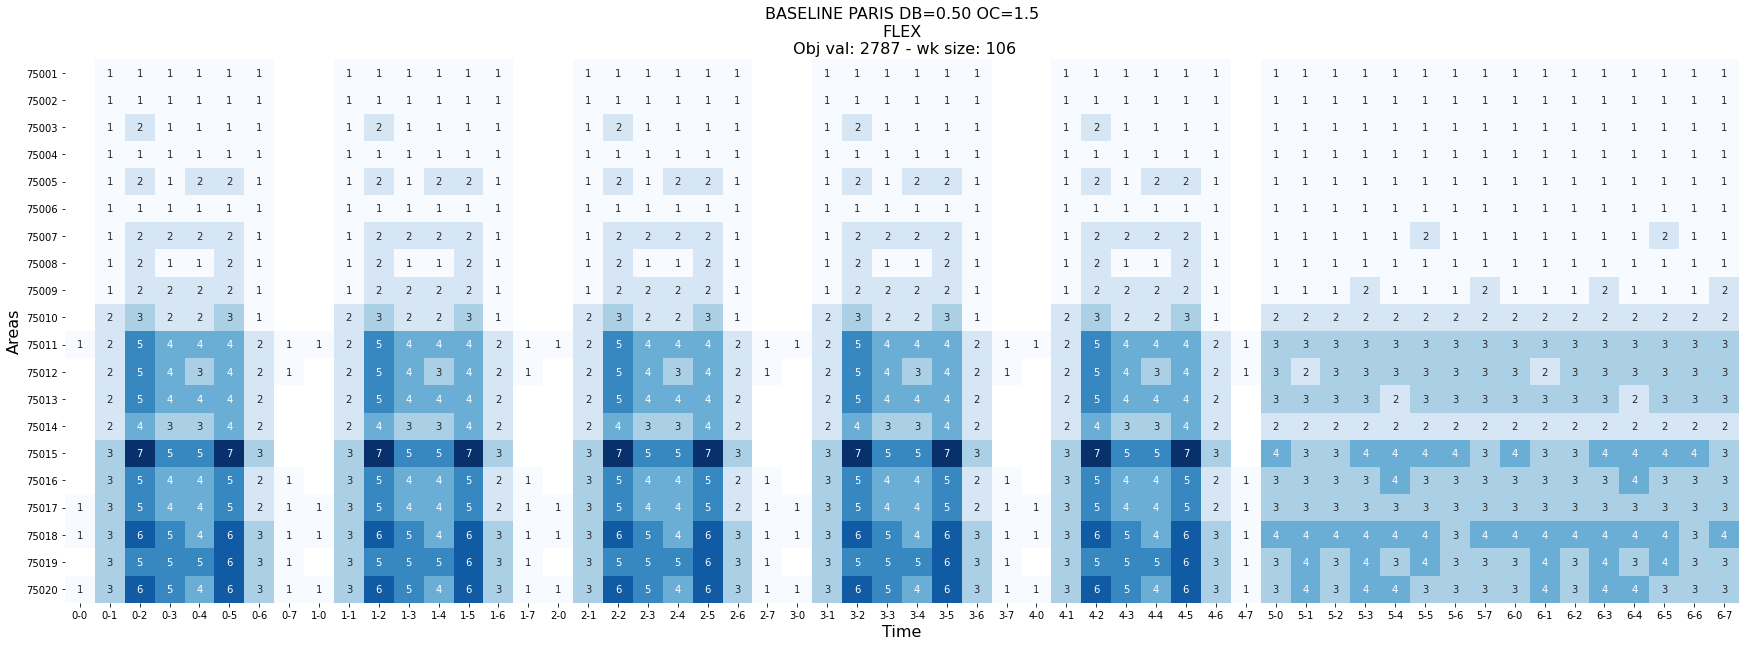

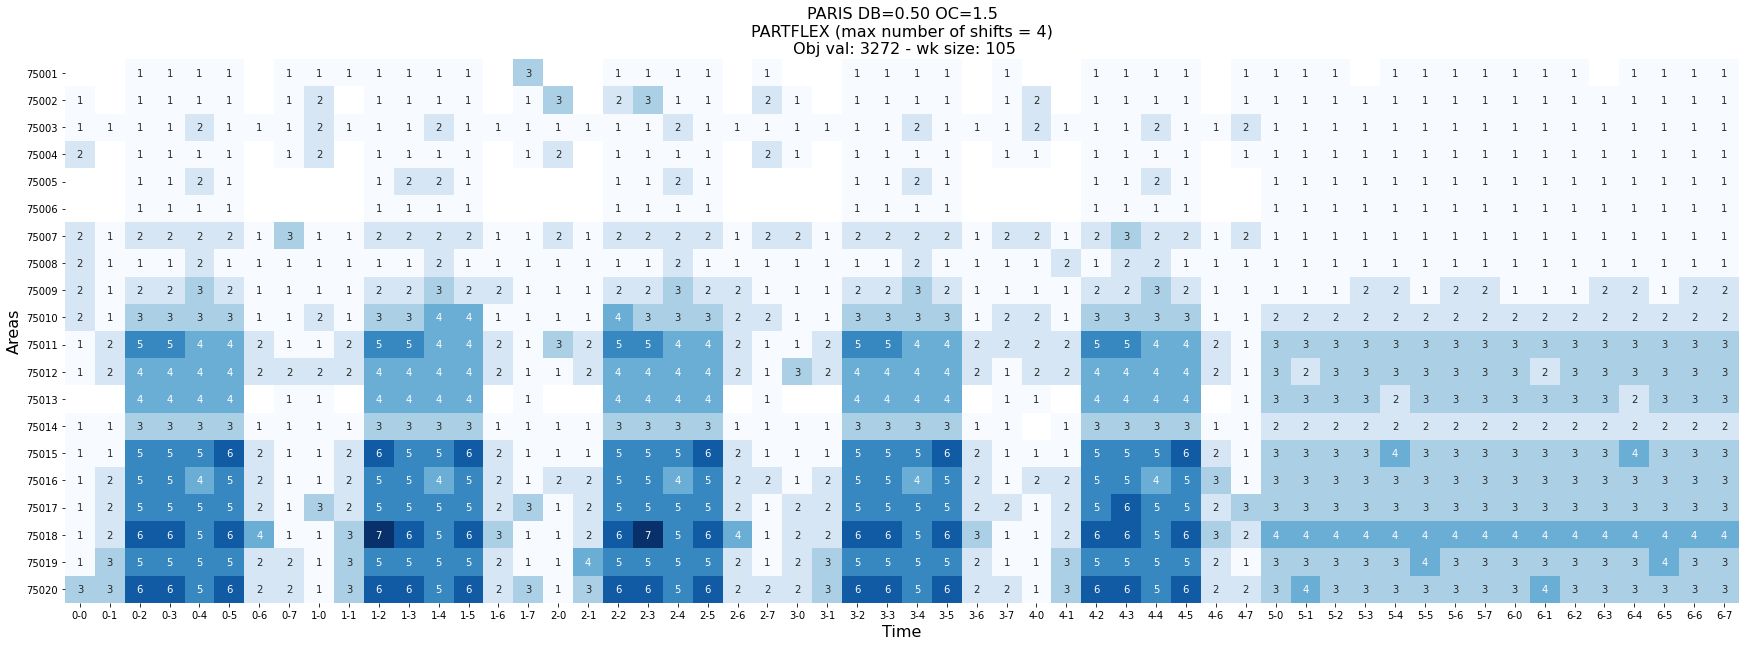

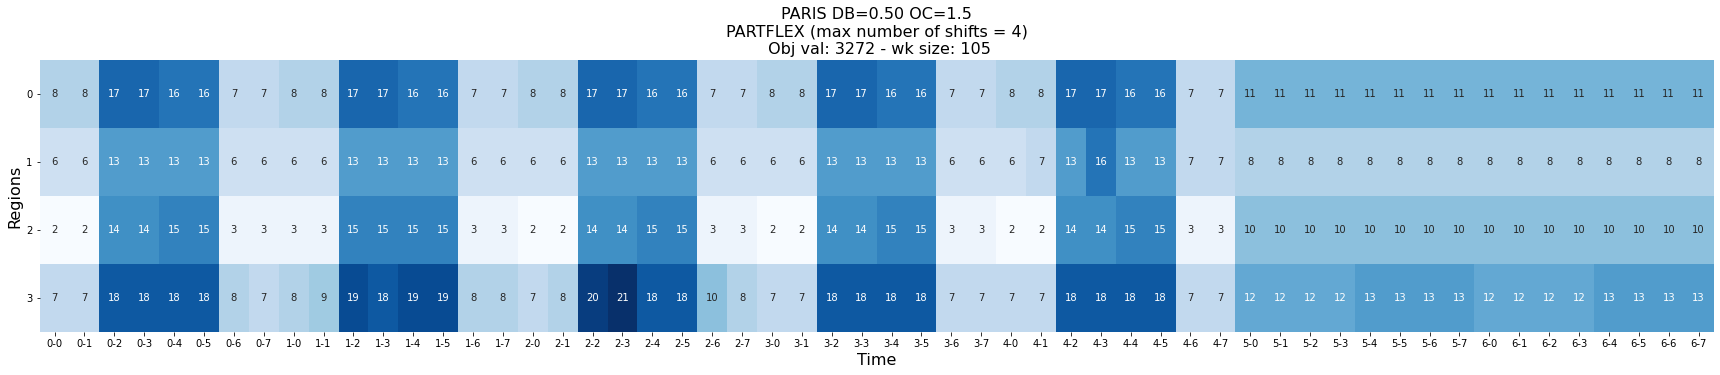

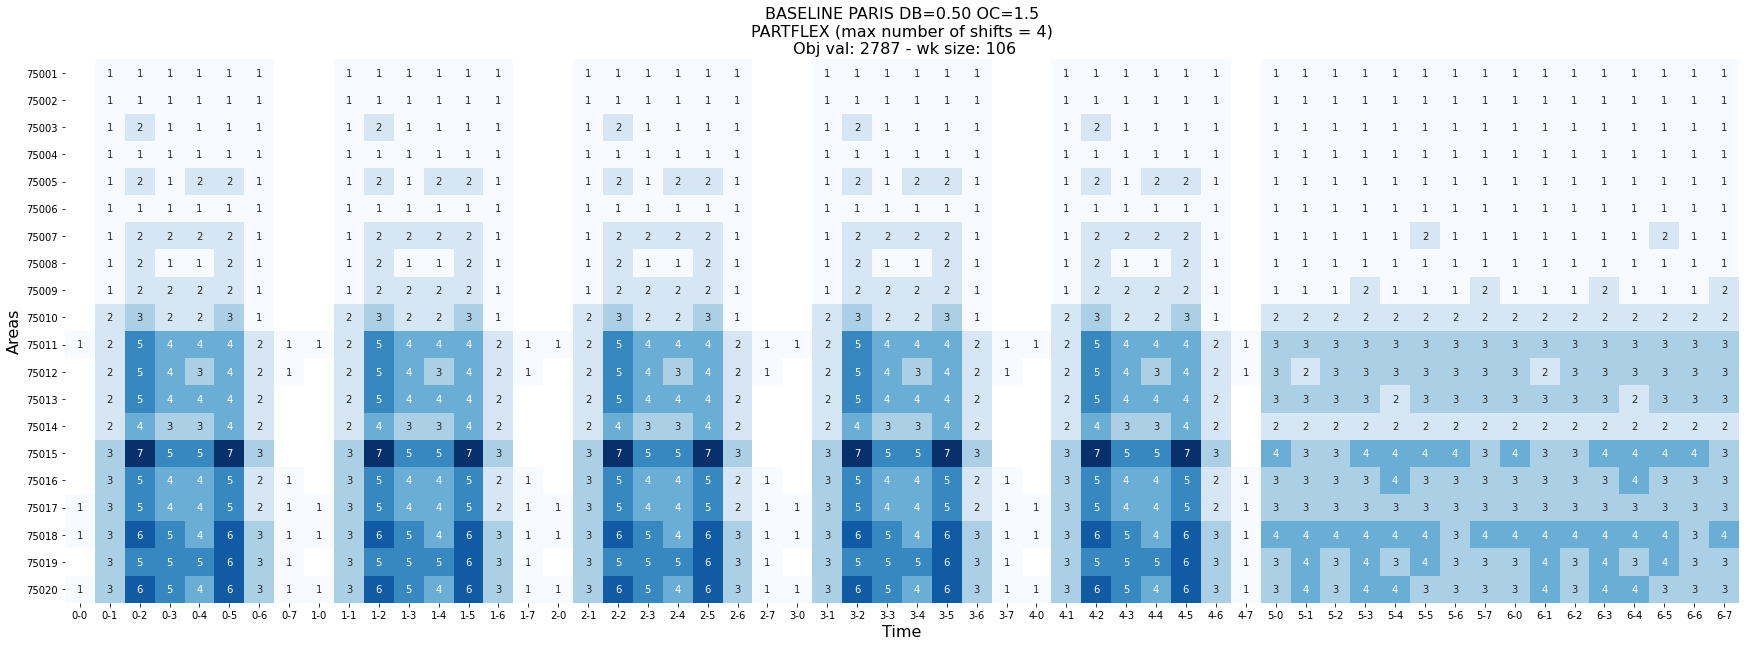

In [113]:
for solution_file in file_names:

    with open(f'{directory}/{solution_file}', 'rb') as file:
        solution = pickle.load(file)
    
    # AREA
    area_df = data_prepare(solution, subset_areas=None)
    area_df.to_csv(f'rostering_area_{solution_file}.csv')
    plot_area_periods(solution_file, solution, area_df, is_baseline=False)
    
    # REGION
    area_df['region_id'] = area_df['area_id'].map(area_region_map)
    region_df = area_df.groupby(['region_id', 'day_period']).agg({'employee': 'sum'}).reset_index()
    region_df.to_csv(f'rostering_region_{solution_file}.csv')
    plot_region_periods(solution_file, solution, region_df, is_baseline=False)

    # AREA BASELINE
    area_df = data_prepare(solution['baseline'], subset_areas=None)
    area_df.to_csv(f'rostering_area_baseline_{solution_file}.csv')
    plot_area_periods(solution_file, solution['baseline'], area_df, is_baseline=True)

# DEMAND

In [114]:
def __load_instance(instance_file: str) -> dict:
    with open(instance_file) as f:
        return json.load(f)

i_weekday = __load_instance(f'../../instances/{city}_db={db}_dt=doublepeak.json')
i_weekend = __load_instance(f'../../instances/{city}_db={db}_dt=uniform.json')

sdemand, srequired = dict(), dict()

for day in range(7):
    if day in [0,1,2,3,4]:
        #weekday
        for scenario in i_weekday['scenarios']:
            s = scenario['scenario_num']
            for data in scenario['data']:
                a = data['area_id']
                for theta, d in enumerate(data['demand']):
                    sdemand[(s, a, theta, day)] = d

                for theta, m in enumerate(data['required_couriers']):
                    srequired[(s, a, theta, day)] = m
    else:
        #weekend
        for scenario in i_weekend['scenarios']:
            s = scenario['scenario_num']
            for data in scenario['data']:
                    a = data['area_id']
                    for theta, d in enumerate(data['demand']):
                        sdemand[(s, a, theta, day)] = d

                    for theta, m in enumerate(data['required_couriers']):
                        srequired[(s, a, theta, day)] = m

In [115]:
deliveries_df = (
    pd.DataFrame([ [s[0], s[1], s[2], s[3], v] for s, v in sdemand.items()],
        columns = ['scenario', 'area_id', 'period', 'day', 'deliveries']
    )
)

deliveries_df_ = (
    deliveries_df
    .groupby(['area_id', 'period', 'day',])
    .agg({'deliveries': 'mean'})
    .reset_index()
)

deliveries_df_['day_period'] = deliveries_df_['day'].astype(str) + '-' + deliveries_df_['period'].astype(str)
deliveries_df_['region_id'] = deliveries_df_['area_id'].map(area_region_map)

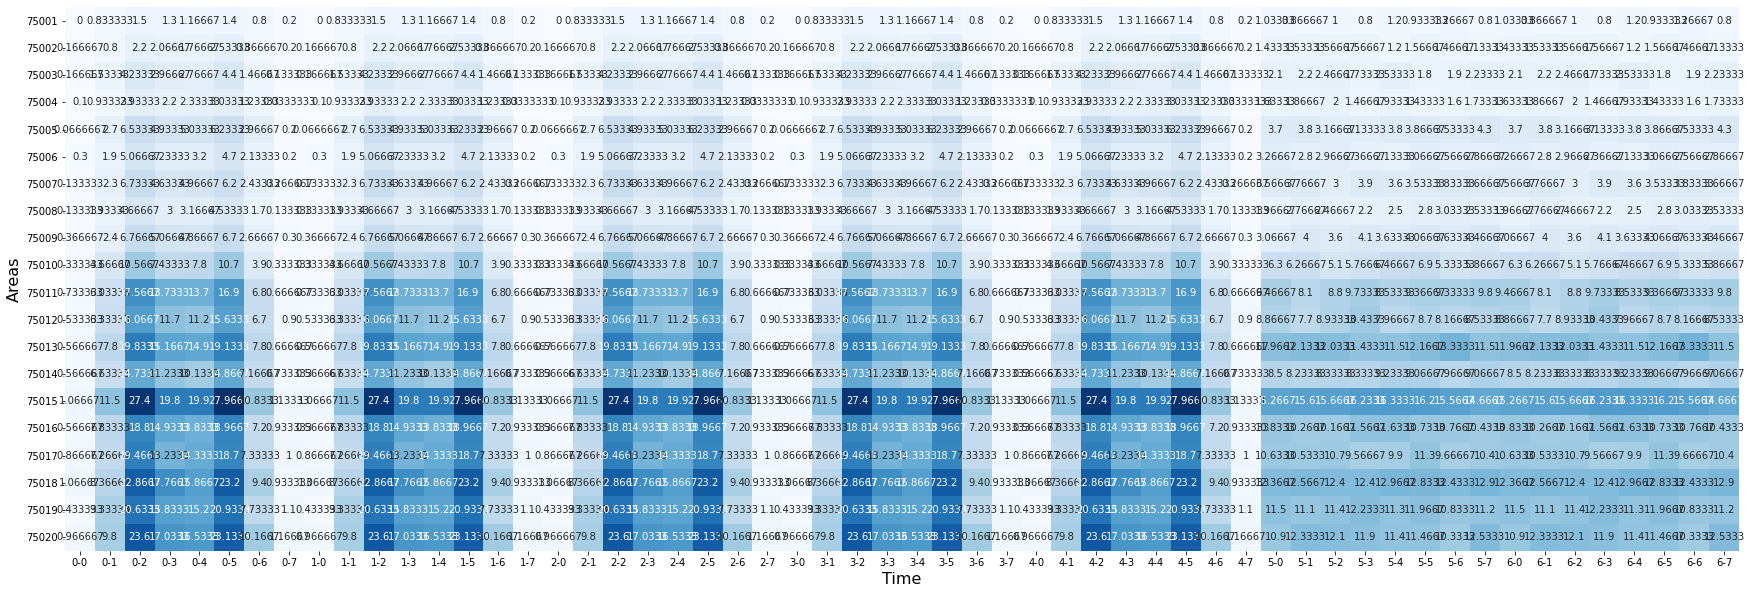

In [116]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(30,10))

pt = pd.pivot(deliveries_df_, index="area_id", 
    columns='day_period', values='deliveries')
sns.heatmap(pt, annot=True, ax=axs, cbar=False, cmap='Blues', fmt='g')

title = ""
axs.set_title(title, fontsize=16)
axs.set_ylabel('Areas', fontsize=16)
axs.set_xlabel('Time', fontsize=16)
plt.yticks(rotation=0)

pt.to_csv(f'demand_area_{city}_db={db}.csv')

plt.show()

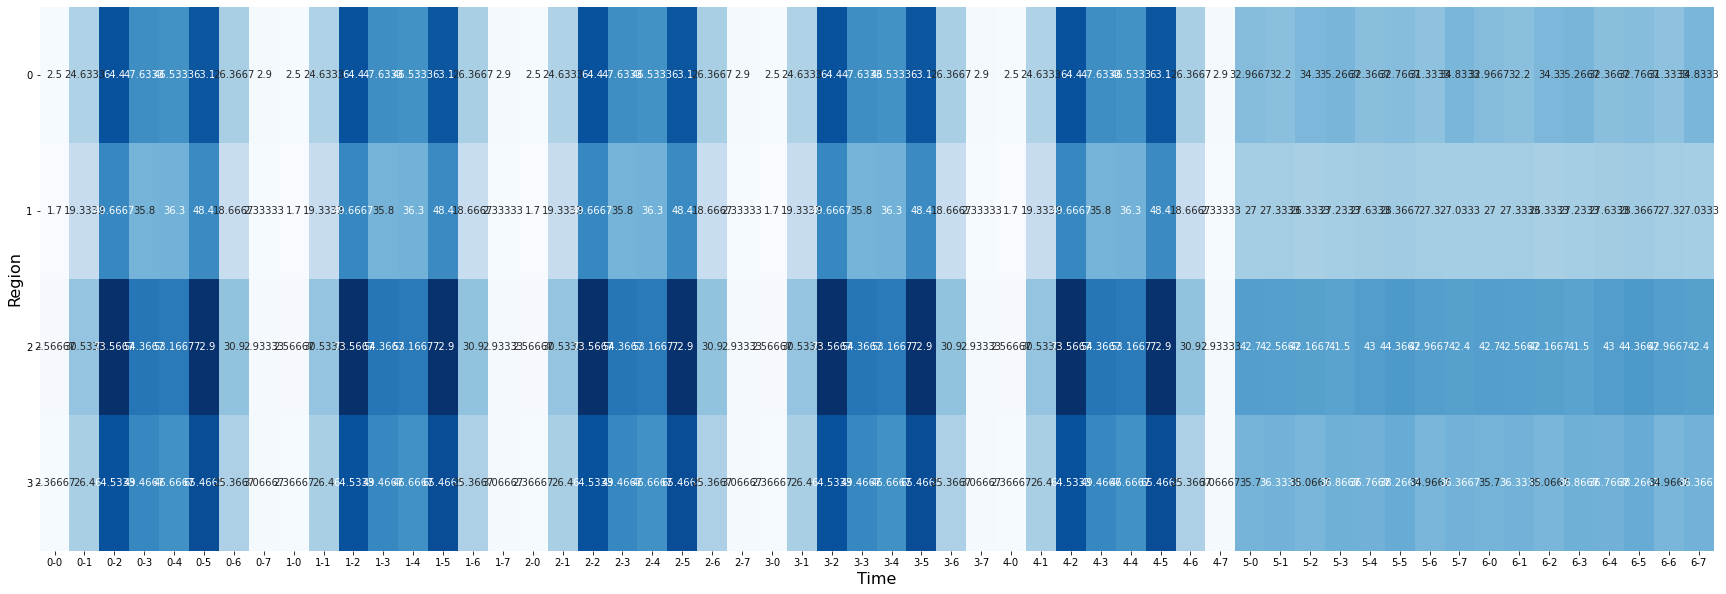

In [117]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(30,10))

pt = pd.pivot(deliveries_df_.groupby(['region_id', 'day_period']).agg({'deliveries': 'sum'}).reset_index(), 
              index="region_id", columns='day_period', values='deliveries')
sns.heatmap(pt, annot=True, ax=axs, cbar=False, cmap='Blues', fmt='g')

title = ""
axs.set_title(title, fontsize=16)
axs.set_ylabel('Region', fontsize=16)
axs.set_xlabel('Time', fontsize=16)
plt.yticks(rotation=0)

pt.to_csv(f'demand_region_{city}_db={db}.csv')
plt.show()

In [118]:
# Population in each area
area_population = []
for region in i_weekday['geography']['city']['regions']:
    for area in region['areas']:
        #area['region_id'] = region
        area_population.append(area)
pd.DataFrame(area_population)

,id,population,surface_area,avg_distance_to_depot
0,75019,186652.0,6.54,0.984
1,75002,23009.0,0.77,0.473
2,75009,60139.0,2.42,0.586
3,75010,95394.0,2.99,0.660
4,75001,17308.0,1.94,0.576
5,75018,202685.0,5.81,0.989
6,75020,196880.0,6.28,0.997
7,75004,28012.0,1.70,0.520
8,75012,144262.0,16.19,2.305
9,75003,35652.0,1.08,0.428


In [119]:
couriers_df = (
    pd.DataFrame([ [s[0], s[1], s[2], s[3], v] for s, v in srequired.items()],
        columns = ['scenario', 'area_id', 'period', 'day', 'required_couriers']
    )
)

couriers_df_ = (
    couriers_df
    .groupby(['area_id', 'period', 'day',])
    .agg({'required_couriers': 'median'})
    .reset_index()
)

couriers_df_['day_period'] = couriers_df_['day'].astype(str) + '-' + couriers_df_['period'].astype(str)

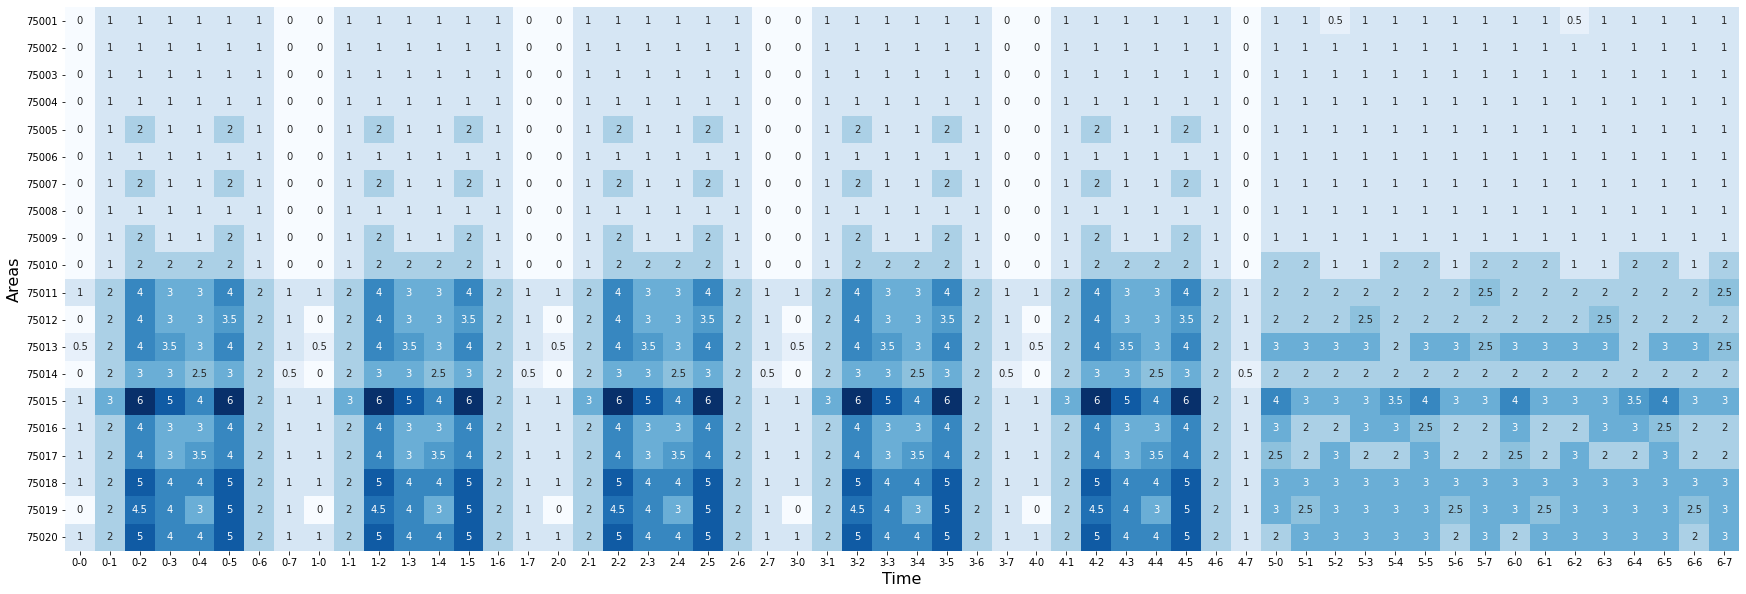

In [120]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(30,10))

pt = pd.pivot(couriers_df_, index="area_id", 
    columns='day_period', values='required_couriers')
sns.heatmap(pt, annot=True, ax=axs, cbar=False, cmap='Blues')

pt.to_csv(f'couriers_area_{city}_db={db}.csv')

title = ""
axs.set_title(title, fontsize=16)
axs.set_ylabel('Areas', fontsize=16)
axs.set_xlabel('Time', fontsize=16)
plt.yticks(rotation=0)

plt.show()

# Hours worked

In [121]:
import os
import pickle
import pandas as pd
import numpy as np
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import json
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerTuple

In [122]:
# Function to calculate the total demand
def calculate_total_demand(data):
    total_demand = 0
    scenarios = data['scenarios']
    for scenario in scenarios:
        for area_data in scenario['data']:
            total_demand += sum(area_data['demand'])
    return total_demand/data['num_scenarios']

In [123]:
# Load in files
directory = '../../raw_results'
file_names = os.listdir(directory)

results_df = pd.DataFrame()


results_file = f'{directory}/{file_names[0]}'
with open(results_file, 'rb') as file:
    sol = pickle.load(file)

In [129]:
# Load in files
directory = '../../raw_results'
file_names = os.listdir(directory)
# FILTER FILES
file_names = [name for name in file_names if 'paris' in name and 'db=0.50' in name and 'OC=1.5' in name]
print(file_names)

results_df = pd.DataFrame()

for i in range(len(file_names)):
    results_file = f'{directory}/{file_names[i]}'
    with open(results_file, 'rb') as file:
        sol = pickle.load(file)

    # Calculate number of total packages
    pattern = r'^(.+?)_OC'
    base_name = re.search(pattern, file_names[i]).group(1)
    weekday_path = f'../../instances/{base_name}_dt=doublepeak.json'
    weekend_path = f'../../instances/{base_name}_dt=uniform.json'

    with open(weekday_path, 'r') as file:
        weekday = json.load(file)

    with open(weekend_path, 'r') as file:
        weekend = json.load(file)

    weekend_demand = calculate_total_demand(weekend)
    weekday_demand = calculate_total_demand(weekday)
    total_demand = weekend_demand*2 + weekday_demand*5

    # Obtain baseline results
    keys_to_keep = ['city', 'demand_baseline', 'outsourcing_cost_multiplier', 'model', 'max_n_shifts', 'workforce_size', 'wage_costs', 'objective_value', 'objective_value_post_wage']
    filtered_baseline = {key: sol['baseline'][key] for key in keys_to_keep}
    results_temp = pd.DataFrame(filtered_baseline)

    # duplicate row to store roster results
    results_temp = pd.concat([results_temp, results_temp], axis=0, ignore_index=True)
    results_temp.at[0, 'model'] =  'baseline'

    # Deal with region key inconsistency
    if 'region' in sol.keys():
        regions = sol['region']
    else:
        regions =  sol['regions']

    # Add the roster results
    wage_costs = sum( (employee, shift_start, day) in sol['r']
                    for region in regions 
                    for employee in sol['employees'][region]
                    for day in sol['days']
                    for shift_start in sol['shifts'][(region, day)])*4
    outsourcing_costs	= sol['obj_val'] - wage_costs

    results_temp.at[1, 'objective_value'] = sol['obj_val']
    results_temp['total_packages'] = total_demand
    results_temp.at[0,'cost_per_package'] = results_temp.at[0, 'objective_value']/total_demand
    results_temp.at[1,'cost_per_package'] = results_temp.at[1, 'objective_value']/total_demand
    results_temp.at[1, 'objective_value_post_wage'] = outsourcing_costs
    results_temp['outsourcing_per_package'] = results_temp['objective_value_post_wage']/total_demand
    results_temp.at[1, 'wage_costs'] = wage_costs
    results_temp['wage_cost_per_package'] = results_temp['wage_costs']/total_demand

    # Calculate percenatge of outsourcing
    results_temp['outsourcing_percentage'] = (results_temp['outsourcing_per_package'])/(results_temp['cost_per_package']*1.5)

    # Calculate weekly hours per employee
    weekly_hours = []
    for region in sol['employees']:
        for employee in sol['employees'][region]:
            weekly_hours.append(sum(1 for shift in sol['r'] if shift[0] == employee)*8)

    baseline_working_hours = ((
        pd.DataFrame([ (key[0], key[1], key[2], key[3]) for key, value in sol['baseline']['k'].items()], 
                columns=['employee', 'area', 'period', 'day']).groupby('employee').agg({'day': 'nunique'})
        .value_counts(normalize=True) * 100)).reset_index()

    for key, row in baseline_working_hours.iterrows():
        if row['proportion'] > 1.0:
            results_temp.at[0, f'working_{int(row["day"]*8)}'] = row['proportion']

    results_temp.at[1, 'working_48'] = sum(100 for hours in weekly_hours if hours == 48)/len(weekly_hours)
    results_temp.at[1, 'working_32'] = sum(100 for hours in weekly_hours if hours == 32)/len(weekly_hours)
    results_temp.at[1, 'working_40'] = sum(100 for hours in weekly_hours if hours ==40)/len(weekly_hours)
    results_temp.at[1, 'working_56'] = 0

    results_df = pd.concat([results_df, results_temp], axis=0, ignore_index=True)

# Fix model names
results_df['model'] = np.where(
    results_df['max_n_shifts'].notna() & (results_df['model'] != "baseline"),  # Condition to check non-null values
    results_df['model'] + '-' + results_df['max_n_shifts'].astype(str),  # True condition
    results_df['model']  # False condition, keep the original 'model'
)

['paris_db=0.50_OC=1.5_model=partflex_max_n_shifts=2.pkl', 'paris_db=0.50_OC=1.5_model=partflex_max_n_shifts=3.pkl', 'paris_db=0.50_OC=1.5_model=fixed.pkl', 'paris_db=0.50_OC=1.5_model=flex.pkl', 'paris_db=0.50_OC=1.5_model=partflex_max_n_shifts=4.pkl']


In [157]:
results_df = results_df.drop_duplicates('model').fillna(0)
results_df.to_csv('paris_shifts_db=0.50.csv')

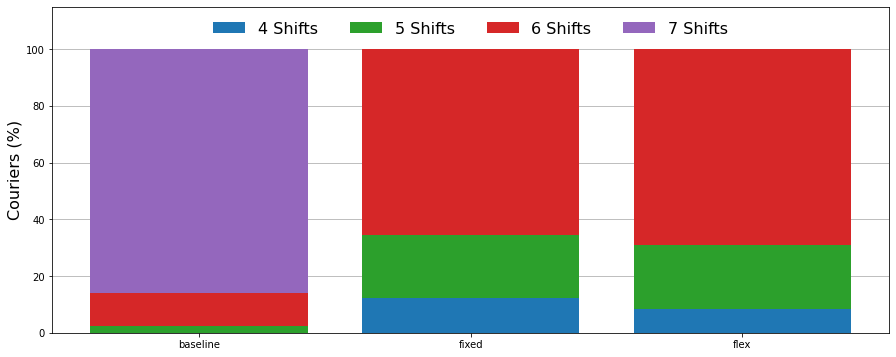

In [156]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd

models = ['baseline', 'fixed', 'flex']

fig, ax = plt.subplots(figsize=(15, 6))

data = results_df[results_df['model'].isin(models)]

# Calculate means for each working hour
working_32_means = data.groupby('model', observed=True)['working_32'].mean().sort_index()
working_40_means = data.groupby('model', observed=True)['working_40'].mean().sort_index()
working_48_means = data.groupby('model', observed=True)['working_48'].mean().sort_index()
working_56_means = data.groupby('model', observed=True)['working_56'].mean().sort_index()

# Plot the bars
ticks = range(len(models))
bottom = 0

ax.bar(
    x=ticks,
    height=working_32_means,
    bottom=bottom,
    color=f"C{0}",
    linewidth=2,
    edgecolor=None,
    label='4 Shifts'
)

bottom += working_32_means
ax.bar(
    x=ticks,
    height=working_40_means,
    bottom=bottom,
    color=f"C{2}",
    linewidth=2,
    edgecolor=None,
    label='5 Shifts'
)

# avoid 7 because we dont reach 100%
working_48_means['flex'] = 100 - working_40_means['flex'] - working_32_means['flex'] 
working_48_means['fixed'] = 100 - working_40_means['fixed'] - working_32_means['fixed'] 

bottom += working_40_means
ax.bar(
    x=ticks,
    height=working_48_means,
    bottom=bottom,
    color=f"C{3}",
    linewidth=2,
    edgecolor=None,
    label='6 Shifts'
)


bottom += working_48_means
ax.bar(
    x=ticks,
    height=100 - bottom,
    bottom=bottom,
    color=f"C{4}",
    linewidth=2,
    edgecolor=None,
    label='7 Shifts'
)

# Customize the plot
ax.set_ylim((0, 115))
ax.set_xticks(ticks)
ax.set_xticklabels(models)
ax.set_ylabel('Couriers (%)', fontsize=16)
ax.yaxis.grid(which='major')
ax.axes.set_axisbelow(True)
ax.set_xlabel('')

ax.legend(loc='upper center', ncols=4, frameon=False, fontsize=16)

plt.show()